In [118]:
import random
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
#Variaveis experimento
EXEC_SOLUTIONS = 30
MAX_ITERATIONS = 55
QUEENS_QUANTITY = 100
MOVEMENT_TIME = 10

In [4]:
def objective_func(candidate_solution, size_solution):
    positive_diagonal = [0 for _ in range(size_solution)]
    negative_diagonal = [0 for _ in range(size_solution)]

    for index in range(size_solution):
        k_positive = index - candidate_solution[index]
        k_negative = index + candidate_solution[index]

        positive_diagonal[index] = k_positive
        negative_diagonal[index] = k_negative

    fit_solution = 0
    fit_solution += (len(positive_diagonal) - len(set(positive_diagonal)))
    fit_solution += (len(negative_diagonal) - len(set(negative_diagonal)))

    return fit_solution

In [5]:
def generate_tabu_matrix(size_combinations):
    tabu_matrix = [[0 for _ in range(size_combinations)], [0 for _ in range(size_combinations)]]
    return tabu_matrix

In [6]:
 
def generate_next_move(current_solution, current_fit, possible_moves, size_moves, tabu_matrix, n_iteration):
    candidate_solution = current_solution.copy()
    neighbor_solutions = []
    # Retorna os indices de movimentos possíveis de acordo com MOVEMENT_TIME
    index_moves = [index for index in range(size_moves) if tabu_matrix[0][index] < n_iteration]

    for move in index_moves:
        candidate_solution[possible_moves[move][0]] = current_solution[possible_moves[move][1]]
        candidate_solution[possible_moves[move][1]] = current_solution[possible_moves[move][0]]

        candidate_fit = objective_func(candidate_solution, len(current_solution))

        if candidate_fit < current_fit:
            # tabu matrix[0] armazena tempo de congelamento; tabu matrix[1] quantidade de vezes do movimento
            tabu_matrix[0][move] += n_iteration + MOVEMENT_TIME
            tabu_matrix[1][move] += 1

            return candidate_solution, candidate_fit, tabu_matrix
        else:
            if candidate_fit == current_fit:
                neighbor_solutions.append([candidate_solution, candidate_fit, move])

            candidate_solution = current_solution.copy()

    if len(neighbor_solutions):
        neighbor_candidate_solution = random.sample(neighbor_solutions, k=1)[0]

        move = neighbor_candidate_solution[2]
        tabu_matrix[0][move] += n_iteration + MOVEMENT_TIME
        tabu_matrix[1][move] += 1

        return neighbor_candidate_solution[0], neighbor_candidate_solution[1], tabu_matrix
    else:
        min_move = min(tabu_matrix[1])
        min_move_index = tabu_matrix[1].index(min_move)
        tabu_matrix[1][min_move_index] += 1

        candidate_solution[possible_moves[min_move_index][0]] = current_solution[possible_moves[min_move_index][1]]
        candidate_solution[possible_moves[min_move_index][1]] = current_solution[possible_moves[min_move_index][0]]

        candidate_fit = objective_func(candidate_solution, len(current_solution))

        return candidate_solution, candidate_fit, tabu_matrix

In [25]:

initial_seconds = time.time()

fitness_exc = [[] for _ in range(EXEC_SOLUTIONS)]
iteration_exc = [[] for _ in range(EXEC_SOLUTIONS)]
time_exc = [[] for _ in range(EXEC_SOLUTIONS)]

possible_moves = list(combinations(list(range(QUEENS_QUANTITY)), r=2))
size_moves = len(possible_moves)

for exc in range(EXEC_SOLUTIONS):
    best_solution = random.sample(range(0, QUEENS_QUANTITY), QUEENS_QUANTITY)
    best_fit = objective_func(best_solution, QUEENS_QUANTITY)

    tabu_matrix = generate_tabu_matrix(size_moves)

    n_iteration = 0S
    initial_seconds = time.time()
    while n_iteration < MAX_ITERATIONS and best_fit != 0:
        

        fitness_exc[exc].append(best_fit)
        iteration_exc[exc].append(n_iteration)

        best_solution, best_fit, tabu_matrix = generate_next_move(
            best_solution, best_fit, possible_moves, size_moves, tabu_matrix, n_iteration)

        n_iteration += 1

    time_exc[exc].append(time.time() - initial_seconds)
    fitness_exc[exc].append(best_fit)
    iteration_exc[exc].append(n_iteration)



### Dados experimento fit

In [59]:
max_length = max(len(seq) for seq in fitness_exc)

fitness_exc_preenchido = [seq + [0] * (max_length - len(seq)) for seq in fitness_exc]

In [113]:
np_fitness_exc = np.array(fitness_exc_preenchido)

30


In [110]:
fitness_mean = np.mean(np_fitness_exc, axis=0)
print(np.mean(np_fitness_exc, axis=0))

[51.83333333 51.96666667 50.5        49.36666667 48.26666667 47.2
 46.13333333 45.         43.93333333 42.8        41.8        40.7
 39.6        38.56666667 37.53333333 36.5        35.43333333 34.4
 33.33333333 32.2        31.16666667 30.13333333 29.13333333 28.03333333
 27.         25.96666667 24.9        23.86666667 22.8        21.76666667
 20.7        19.7        18.7        17.7        16.7        15.66666667
 14.6        13.6        12.6        11.53333333 10.53333333  9.56666667
  8.63333333  7.7         6.83333333  6.          5.2         4.43333333
  3.63333333  2.86666667  2.16666667  1.66666667  1.26666667  0.93333333
  0.73333333  0.5       ]


In [48]:
print(np.std(np_fitness_exc, axis=0))

[4.61940352 4.61507193 4.65295605 4.67962487 4.73943269 4.74973683
 4.78701949 4.73990155 4.77446914 4.79861091 4.79861091 4.85214729
 4.89625707 4.95771004 4.95131857 5.01165309 4.94424469 4.91663842
 4.98887652 5.02261552 5.05360158 5.0314566  5.0314566  4.98319398
 4.97326184 5.04964245 5.03554035 5.01818914 4.96252624 4.94424469
 4.91358661 4.91358661 4.91358661 4.91358661 4.91358661 4.86026977
 4.88944441 4.8        4.8        4.84928403 4.84928403 4.77970245
 4.63668943 4.45084262 4.17997873 3.92428337 3.64600238 3.34348454
 3.10358216 2.8720879  2.54405625 2.24103151 1.89619502 1.56914697
 1.31487219 0.99163165]


In [75]:
print(np.median(np_fitness_exc, axis=0))

[52.5 53.  52.  50.5 49.  48.  47.  46.  45.  44.  43.  42.  41.  40.
 38.5 37.5 36.  35.  34.  33.  32.  31.  30.  29.  28.  27.  25.5 24.5
 23.5 22.5 21.  20.  19.  18.  17.  16.  15.  14.  13.  12.  11.  10.
  9.   8.   7.   6.   5.   4.   3.   2.   1.   1.   0.5  0.   0.   0. ]


#### Graficos fit

In [96]:
iteration_exc = [cont for cont in range(MAX_ITERATIONS + 1)] 

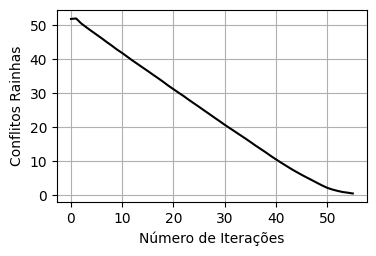

In [107]:
# Defina o tamanho da figura em polegadas (tamanho típico para artigos IEEE)
largura_figura = 4
altura_figura = 2.5  # Você pode ajustar a altura conforme necessário

# Crie a figura com o tamanho especificado
plt.figure(figsize=(largura_figura, altura_figura))

plt.plot(iteration_exc, fitness_mean, color='black')

# Definir rótulos dos eixos
plt.xlabel('Número de Iterações')
plt.ylabel('Conflitos Rainhas')

# Exibir o gráfico
plt.grid(True)
plt.show()

### Tempo

In [41]:
print(np.median(time_exc, axis=0))

[1.04262173]


In [116]:
np.std(time_exc, axis=0)

array([0.427946])

In [117]:
np.median(time_exc, axis=0)

array([1.04262173])